In [95]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA


In [96]:
#reading all 3 datasets
file1_path = 'E:\OneDrive - FAST National University\Semester5\Data Visualization\Theory\Assignment1\Amazon Sale Report.csv'
file2_path = 'E:\OneDrive - FAST National University\Semester5\Data Visualization\Theory\Assignment1\shopping_behavior_updated.csv'
file3_path = r'E:\OneDrive - FAST National University\Semester5\Data Visualization\Theory\Assignment1\unemployment_analysis.csv'

df1 = pd.read_csv(file1_path) 
df2 = pd.read_csv(file2_path)
df3 = pd.read_csv(file3_path)

#print(df1)

C:\Users\HP\AppData\Local\Temp\ipykernel_22148\1148168573.py:6: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(file1_path)


In [97]:
#selecting all the important columns to merge on basis of country column
#only important important columns which will be useful for further analysis

df1_selected = df1[['Date', 'Status','Size','Amount', 'Qty', 'ship-city']].copy()
df1_selected.rename(columns={'ship-city': 'City'}, inplace=True)

df2_selected = df2[['Customer ID','Age','Gender', 'Item Purchased', 'Season','Category','Purchase Amount (USD)', 'Location']].copy()
df2_selected.rename(columns={'Purchase Amount (USD)': 'Amount', 'Location': 'City'}, inplace=True)

df3_selected = df3[['Country Name', '2021']].copy()
df3_selected.rename(columns={'2021': 'Unemployment Rate'}, inplace=True)

df1_selected['synthetic_index'] = range(len(df1_selected))
df2_selected['synthetic_index'] = range(len(df2_selected))
df3_selected['synthetic_index'] = range(len(df3_selected))

combined_df = pd.merge(df1_selected, df2_selected, on='synthetic_index', how='outer', suffixes=('_df1', '_df2'))
combined_df = pd.merge(combined_df, df3_selected, on='synthetic_index', how='outer')

combined_df.drop('synthetic_index', axis=1, inplace=True)

combined_df.fillna('Not Available', inplace=True)

print(combined_df.head())


       Date                        Status Size Amount_df1  Qty     City_df1  \
0  04-30-22                     Cancelled    S     647.62    0       MUMBAI   
1  04-30-22  Shipped - Delivered to Buyer  3XL      406.0    1    BENGALURU   
2  04-30-22                       Shipped   XL      329.0    1  NAVI MUMBAI   
3  04-30-22                     Cancelled    L     753.33    0   PUDUCHERRY   
4  04-30-22                       Shipped  3XL      574.0    1      CHENNAI   

  Customer ID   Age Gender Item Purchased  Season  Category Amount_df2  \
0         1.0  55.0   Male         Blouse  Winter  Clothing       53.0   
1         2.0  19.0   Male        Sweater  Winter  Clothing       64.0   
2         3.0  50.0   Male          Jeans  Spring  Clothing       73.0   
3         4.0  21.0   Male        Sandals  Spring  Footwear       90.0   
4         5.0  45.0   Male         Blouse  Spring  Clothing       49.0   

        City_df2                 Country Name Unemployment Rate  
0       Kentuc

In [98]:

#wherever extra lines start Not Available is shown so replace it with the mode of that column
for column in combined_df.columns:
    mode_value = combined_df[column][combined_df[column] != 'Not Available'].mode()[0]
    combined_df[column] = combined_df[column].replace('Not Available', mode_value)

print(combined_df.tail())


            Date   Status Size  Amount_df1  Qty   City_df1  Customer ID   Age  \
128970  05-31-22  Shipped   XL       517.0    1  HYDERABAD          1.0  69.0   
128971  05-31-22  Shipped    M       999.0    1   GURUGRAM          1.0  69.0   
128972  05-31-22  Shipped  XXL       690.0    1  HYDERABAD          1.0  69.0   
128973  05-31-22  Shipped   XS      1199.0    1      Halol          1.0  69.0   
128974  05-31-22  Shipped    S       696.0    1     Raipur          1.0  69.0   

       Gender Item Purchased  Season  Category  Amount_df2 City_df2  \
128970   Male         Blouse  Spring  Clothing        32.0  Montana   
128971   Male         Blouse  Spring  Clothing        32.0  Montana   
128972   Male         Blouse  Spring  Clothing        32.0  Montana   
128973   Male         Blouse  Spring  Clothing        32.0  Montana   
128974   Male         Blouse  Spring  Clothing        32.0  Montana   

       Country Name  Unemployment Rate  
128970  Afghanistan               5.79  
1289

In [99]:
#detecting outliers for numerical column
combined_df['Amount_df1'] = pd.to_numeric(combined_df['Amount_df1'], errors='coerce')

Q1 = combined_df['Amount_df1'].quantile(0.25)
Q3 = combined_df['Amount_df1'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = combined_df[(combined_df['Amount_df1'] < lower_bound) | (combined_df['Amount_df1'] > upper_bound)]
print("Outliers in Amount:")
print(outliers)


Outliers in Amount:
            Date                        Status Size  Amount_df1  Qty  \
102     04-30-22  Shipped - Delivered to Buyer  XXL      1338.0    1   
146     04-30-22  Shipped - Delivered to Buyer    M      1399.0    1   
243     04-30-22                       Shipped  XXL      1338.0    1   
265     04-30-22                       Shipped  XXL      2130.0    2   
299     04-30-22                       Shipped    S      1463.0    1   
...          ...                           ...  ...         ...  ...   
128811  06-01-22                       Shipped  5XL      1399.0    1   
128846  06-01-22                     Cancelled    M      1364.0    1   
128873  06-01-22  Shipped - Delivered to Buyer    S      1523.0    1   
128911  05-31-22                       Shipped   XL      1349.0    1   
128957  05-31-22                       Shipped    M      1349.0    1   

         City_df1  Customer ID   Age Gender Item Purchased  Season  \
102     AMBARNATH        103.0  51.0   Male  

In [100]:
#removing outliers
combined_df = combined_df[(combined_df['Amount_df1'] >= lower_bound) & (combined_df['Amount_df1'] <= upper_bound)]
print(combined_df)

            Date                        Status Size  Amount_df1  Qty  \
0       04-30-22                     Cancelled    S      647.62    0   
1       04-30-22  Shipped - Delivered to Buyer  3XL      406.00    1   
2       04-30-22                       Shipped   XL      329.00    1   
3       04-30-22                     Cancelled    L      753.33    0   
4       04-30-22                       Shipped  3XL      574.00    1   
...          ...                           ...  ...         ...  ...   
128970  05-31-22                       Shipped   XL      517.00    1   
128971  05-31-22                       Shipped    M      999.00    1   
128972  05-31-22                       Shipped  XXL      690.00    1   
128973  05-31-22                       Shipped   XS     1199.00    1   
128974  05-31-22                       Shipped    S      696.00    1   

           City_df1  Customer ID   Age Gender Item Purchased  Season  \
0            MUMBAI          1.0  55.0   Male         Blouse  W

In [101]:

#standardize numerical column to a range so that PCA can be applied easily
scaler = StandardScaler()

combined_df[['Amount_df1','Amount_df2', 'Unemployment Rate']] = scaler.fit_transform(combined_df[['Amount_df1','Amount_df2', 'Unemployment Rate']].fillna(0))  # fill NaNs with 0 or appropriate value before scaling

print(combined_df[['Amount_df1','Amount_df2', 'Unemployment Rate']].head())


   Amount_df1  Amount_df2  Unemployment Rate
0    0.140455    3.188076           8.924919
1   -0.834382    4.928232          28.852306
2   -1.145045    6.351996           4.029797
3    0.566952    9.041328          10.543778
4   -0.156571    2.555292          23.224843


In [102]:

#encoding of categorical columns by assigning an integer value for further PCA operations
encoder = LabelEncoder()
combined_df[['Gender', 'Category']] = combined_df[['Gender', 'Category']].fillna('Missing')
combined_df['Gender'] = encoder.fit_transform(combined_df['Gender'])
combined_df['Category'] = encoder.fit_transform(combined_df['Category'])
print(combined_df[['Gender', 'Category']].head())


   Gender  Category
0       1         1
1       1         1
2       1         1
3       1         2
4       1         1


In [103]:
#creating 2 new features from already given columns in the dataset
#based on category
combined_df['Total Sales Per Transaction'] = combined_df['Amount_df2'] * combined_df['Qty']
combined_df['Average Transaction Value'] = combined_df['Amount_df2'].mean()
if 'Category' in combined_df.columns:
    combined_df['Average Transaction Value by Category'] = combined_df.groupby('Category')['Amount_df2'].transform('mean')

print(combined_df.head())



       Date                        Status Size  Amount_df1  Qty     City_df1  \
0  04-30-22                     Cancelled    S    0.140455    0       MUMBAI   
1  04-30-22  Shipped - Delivered to Buyer  3XL   -0.834382    1    BENGALURU   
2  04-30-22                       Shipped   XL   -1.145045    1  NAVI MUMBAI   
3  04-30-22                     Cancelled    L    0.566952    0   PUDUCHERRY   
4  04-30-22                       Shipped  3XL   -0.156571    1      CHENNAI   

   Customer ID   Age  Gender Item Purchased  Season  Category  Amount_df2  \
0          1.0  55.0       1         Blouse  Winter         1    3.188076   
1          2.0  19.0       1        Sweater  Winter         1    4.928232   
2          3.0  50.0       1          Jeans  Spring         1    6.351996   
3          4.0  21.0       1        Sandals  Spring         2    9.041328   
4          5.0  45.0       1         Blouse  Spring         1    2.555292   

        City_df2                 Country Name  Unemploym

In [105]:
#filling missing values with mean of that column
for column in combined_df.columns:
    if combined_df[column].dtype in ['float64', 'int64']:  # Only numeric columns
        combined_df[column] = combined_df[column].fillna(combined_df[column].mean())


In [106]:

#selecting numerical columns and then applying PCA for 2 components
#applying PCA to reduce the number of variables or features but still preserving the most important information
scaler = StandardScaler()
numerical_columns = combined_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaled_data = scaler.fit_transform(combined_df[numerical_columns])

pca = PCA(n_components=2)  
principal_components = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

combined_df = pd.concat([combined_df.reset_index(drop=True), pca_df], axis=1)

#measure of proportion of the total vairnace in the original dataset
print("Explained Variance Ratio:", pca.explained_variance_ratio_)




Explained Variance Ratio: [0.45473146 0.14697917]


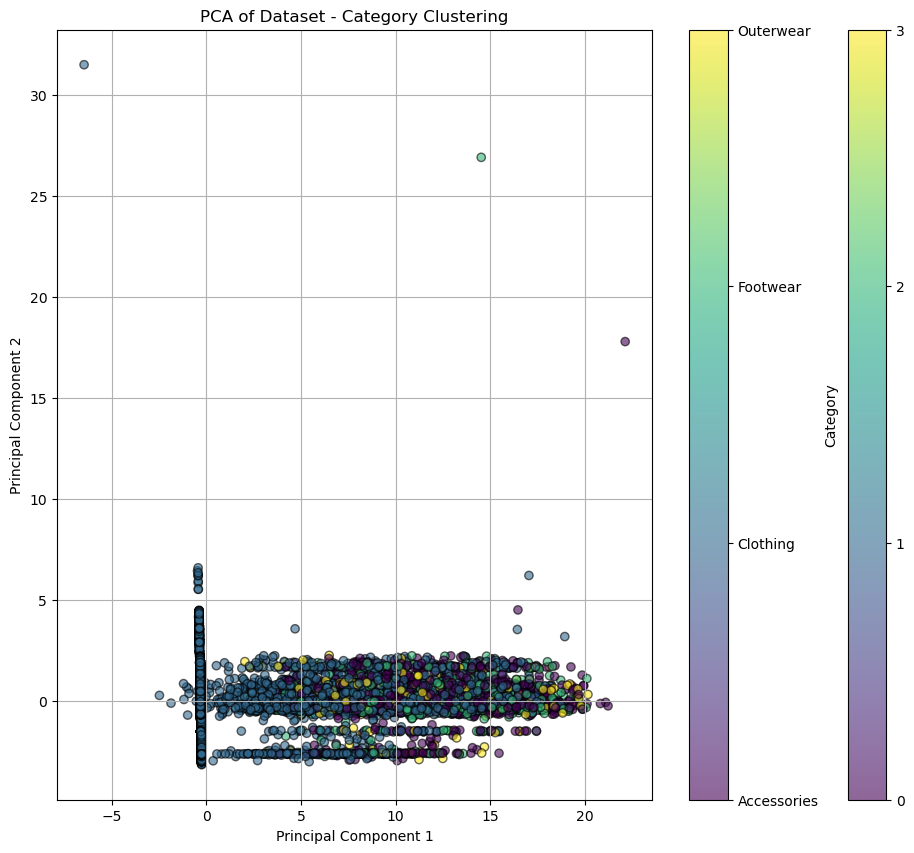

In [108]:

#PCA on dataset by category

category_names = encoder.inverse_transform(combined_df['Category'].unique())  # Get unique category names
category_mapping = dict(zip(combined_df['Category'].unique(), category_names))  # Create a mapping

mapped_labels = [category_mapping[label] for label in combined_df['Category']]

plt.figure(figsize=(12, 10))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.6, c=combined_df['Category'], cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset - Category Clustering')
plt.colorbar(scatter, ticks=np.unique(combined_df['Category']))
cbar = plt.colorbar(scatter)
cbar.set_label('Category')
cbar.set_ticks(list(category_mapping.keys()))
cbar.set_ticklabels(list(category_mapping.values()))

plt.grid(True)
plt.show()


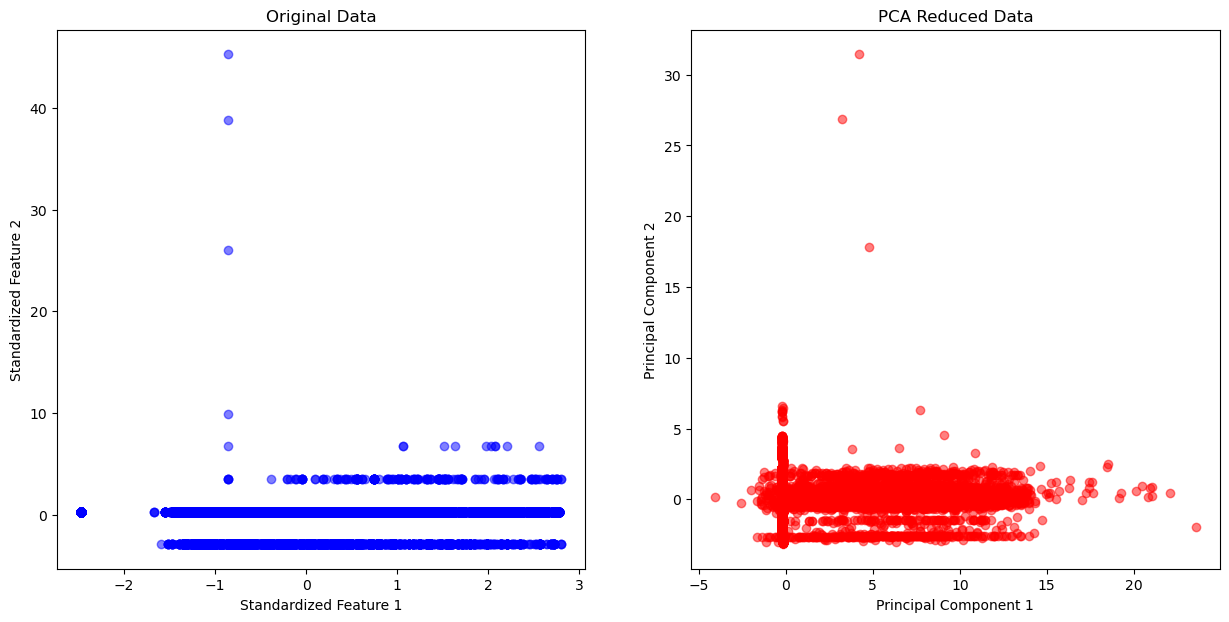

In [109]:
#how the dimensionality reduction had an impact where important data is also lost
numerical_columns = ['Amount_df1', 'Qty', 'Age', 'Amount_df2', 'Unemployment Rate']
X = combined_df[numerical_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  
X_reduced = pca.fit_transform(X_scaled)

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c='blue', alpha=0.5)
ax[0].set_title('Original Data')
ax[0].set_xlabel('Standardized Feature 1')
ax[0].set_ylabel('Standardized Feature 2')

ax[1].scatter(X_reduced[:, 0], X_reduced[:, 1], c='red', alpha=0.5)
ax[1].set_title('PCA Reduced Data')
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 2')

plt.show()


In [110]:

#calculating CLV for each customer segment i.e based on category 
#average
apv = combined_df.groupby('Category')['Amount_df2'].mean()

#purchase freq
pf = combined_df.groupby('Category').size() / combined_df.groupby('Category')['Customer ID'].nunique()

lifespan = 3  

clv = apv * pf * lifespan

clv_df = pd.DataFrame({
    'Average Purchase Value': apv,
    'Purchase Frequency': pf,
    'Customer Lifespan': lifespan,
    'CLV': clv
}).reset_index()

print(clv_df)


   Category  Average Purchase Value  Purchase Frequency  Customer Lifespan  \
0         0                4.250509             1.00000                  3   
1         1               -0.072431            71.90814                  3   
2         2                4.347373             1.00000                  3   
3         3                3.852201             1.00000                  3   

         CLV  
0  12.751527  
1 -15.625072  
2  13.042118  
3  11.556602  


In [111]:
print(combined_df.columns)

Index(['Date', 'Status', 'Size', 'Amount_df1', 'Qty', 'City_df1',
       'Customer ID', 'Age', 'Gender', 'Item Purchased', 'Season', 'Category',
       'Amount_df2', 'City_df2', 'Country Name', 'Unemployment Rate',
       'Total Sales Per Transaction', 'Average Transaction Value',
       'Average Transaction Value by Category', 'PC1', 'PC2'],
      dtype='object')


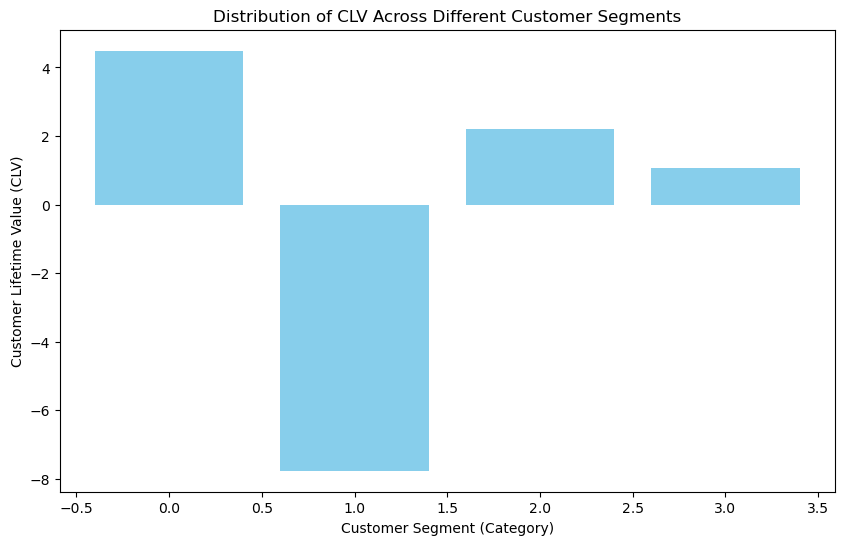

In [114]:

#visualization of CLV
df = pd.DataFrame(combined_df)

grouped = df.groupby('Category')
average_purchase_value = grouped['Amount_df2'].mean()
purchase_frequency = grouped.size() / df['Customer ID'].nunique()
retention_rate = 0.7
customer_value = average_purchase_value * purchase_frequency
customer_lifespan = 1 / (1 - retention_rate)
clv = customer_value * customer_lifespan

clv_df = pd.DataFrame({
    'Category': grouped.groups.keys(),
    'CLV': clv
}).reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.bar(clv_df['Category'], clv_df['CLV'], color='skyblue')
plt.xlabel('Customer Segment (Category)')
plt.ylabel('Customer Lifetime Value (CLV)')
plt.title('Distribution of CLV Across Different Customer Segments')
plt.show()


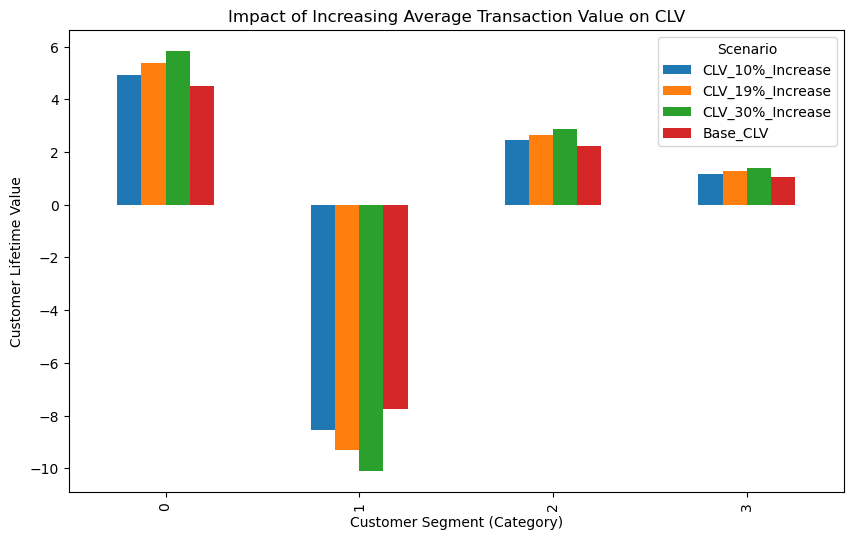

In [113]:
#how changes in certain variable may affect key metrics
#here we've increased average transaction value

grouped = combined_df.groupby('Category')
average_purchase_value = grouped['Amount_df2'].mean()
purchase_frequency = grouped.size() / combined_df['Customer ID'].nunique()
retention_rate = 0.7  
customer_value = average_purchase_value * purchase_frequency
customer_lifespan = 1 / (1 - retention_rate)

base_clv = customer_value * customer_lifespan
increments = [1.1, 1.2, 1.3]  

clv_results = pd.DataFrame(index=grouped.groups.keys())

for increment in increments:
    adjusted_purchase_value = average_purchase_value * increment
    adjusted_customer_value = adjusted_purchase_value * purchase_frequency
    adjusted_clv = adjusted_customer_value * customer_lifespan
    clv_results[f'CLV_{int((increment - 1) * 100)}%_Increase'] = adjusted_clv

clv_results['Base_CLV'] = base_clv

fig, ax = plt.subplots(figsize=(10, 6))
clv_results.plot.bar(ax=ax)
plt.title('Impact of Increasing Average Transaction Value on CLV')
plt.xlabel('Customer Segment (Category)')
plt.ylabel('Customer Lifetime Value')
plt.legend(title='Scenario')
plt.show()
